# 优化器

深度学习优化算法经历以下几个阶段：

lr:learning rate
- 梯度下降(SGD,无动量概念）
    
    缺点：下降速度慢，在沟壑两边持续震荡，停留在局部最优点
    
$w+=-lr*dx$
- Momentum(喝醉酒的人)动量

    为抑制SGD的震荡，加入惯性。若下降是陡坡，则快一些
    
$m = b1*m-lr*dx$
$w+=m$
- AdaGrade 每一个参数的更新都有不同的学习率(不好走的鞋子)

$v+=dx^2$
$w+=-lr*dx/sqrt(v)$
- RMSProp

    为缓解陷入局部最优问题

$m = b1*m-lr*dx$   and   $v+=dx^2$ =>

$v = b1*v+(1-b1)*dx^2$

$w += -lr*dx/sqrt(v)$
- Adam

$m = b1*m+(1-b1)dx$   Momentum

$v = b2*v+(1-b2)*dx^2$  AdaGrad

$w+=-lr*m/sqrt(v)$

== 借鉴自莫烦视频==

In [18]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

x = torch.unsqueeze(torch.linspace(-1,1,200),dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())
# x,y = Variable(x),Variable(y)
# ?Data.TensorDataset
# 1.0版本中不能这样写了
# torch_dataset = Data.TensorDataset(data_tensor = x,target_tensor=y)
# 这样写可以
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)


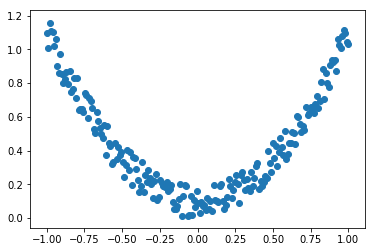

In [19]:
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [20]:
LR = 0.01
BATCH_SIZE=32
EPOCH = 12

In [22]:
# 设计
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x = F.relu(self.hidden(x))  # 这里是一个方法
        x = self.predict(x)
        return x
# different nets
net_SGD = Net(1,10,1)
net_Momentum = Net(1,10,1)
net_RMSprop = Net(1,10,1)
net_Adam = Net(1,10,1)
nets = [net_SGD,net_Momentum,net_RMSprop,net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(),lr = LR)
# 是在SGD优化器中加入动量元素，相当于上文的b1；SGDM
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8) 
# 
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)  
# betas元组表示上文的b1,b2
opt_Adam = torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers = [opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]] #记录不同优化器的损失函数值


In [26]:
# 训练
for epoch in range(EPOCH):
    print(epoch)
    for step,(batch_x,batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        # 打包在一起
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output = net(b_x)
            loss = loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.item())
            
            

0
1
2
3
4
5
6
7
8
9
10
11


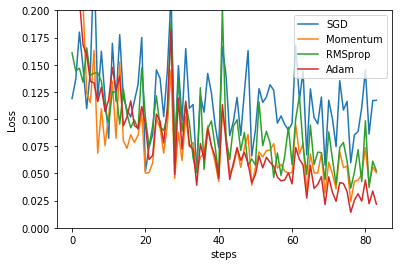

In [28]:
# 结果展示
labels = ['SGD','Momentum','RMSprop','Adam']
for i,l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i])
plt.legend(loc='best')
plt.xlabel('steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()

- 可以看出，Adam优化方法是最快的